In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots


In [16]:
rape = pd.read_csv('rape_eda/Rape 2019.csv')
rape

,Category,State/UT,Punishment for Rape,Rape in Custody- Rape in Custody (Total),Rape in Custody - By Police Personnel,Rape in Custody - By Public Servant,Rape in Custody - By Member of Armed Forces,Rape in Custody - By Management/Staff of Jail/Remand Home/Place of Custody,Rape in Custody - By Management/ Staff of Hospital,Rape Other than Custodial (Total),...,Other Than Custodial Rape - Repeated Rape on same women,Punishment upto 20 years extended to life for Rape (Below 16 Yrs),Punishment for causing Death,By Separated husband,Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death),By Person in Authority,Gang Rape,Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death),Punishment for Repeat offenders,Rape (Total)
0,State,Andhra Pradesh,758,1,0,0,1,0,0,283,...,98,15,0,0,10,1,9,2,0,1086
1,State,Arunachal Pradesh,46,0,0,0,0,0,0,12,...,2,0,0,1,0,0,4,0,0,63
2,State,Assam,1599,11,0,0,0,11,0,104,...,0,0,1,1,1,30,25,0,0,1773
3,State,Bihar,700,0,0,0,0,0,0,16,...,0,0,0,0,0,0,14,0,0,730
4,State,Chhattisgarh,546,1,1,0,0,0,0,469,...,31,0,0,0,3,0,15,0,0,1036
5,State,Goa,54,1,0,0,0,0,1,14,...,1,1,0,0,0,0,2,0,0,72
6,State,Gujarat,429,0,0,0,0,0,0,85,...,62,0,0,0,0,0,14,0,0,528
7,State,Haryana,900,2,0,1,0,0,1,363,...,308,0,2,4,0,1,159,0,49,1480
8,State,Himachal Pradesh,302,0,0,0,0,0,0,50,...,1,2,0,0,1,0,4,0,0,359
9,State,Jammu & Kashmir,177,0,0,0,0,0,0,46,...,0,0,0,0,0,0,0,0,0,223


In [17]:
rape.head()

,Category,State/UT,Punishment for Rape,Rape in Custody- Rape in Custody (Total),Rape in Custody - By Police Personnel,Rape in Custody - By Public Servant,Rape in Custody - By Member of Armed Forces,Rape in Custody - By Management/Staff of Jail/Remand Home/Place of Custody,Rape in Custody - By Management/ Staff of Hospital,Rape Other than Custodial (Total),...,Other Than Custodial Rape - Repeated Rape on same women,Punishment upto 20 years extended to life for Rape (Below 16 Yrs),Punishment for causing Death,By Separated husband,Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death),By Person in Authority,Gang Rape,Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death),Punishment for Repeat offenders,Rape (Total)
0,State,Andhra Pradesh,758,1,0,0,1,0,0,283,...,98,15,0,0,10,1,9,2,0,1086
1,State,Arunachal Pradesh,46,0,0,0,0,0,0,12,...,2,0,0,1,0,0,4,0,0,63
2,State,Assam,1599,11,0,0,0,11,0,104,...,0,0,1,1,1,30,25,0,0,1773
3,State,Bihar,700,0,0,0,0,0,0,16,...,0,0,0,0,0,0,14,0,0,730
4,State,Chhattisgarh,546,1,1,0,0,0,0,469,...,31,0,0,0,3,0,15,0,0,1036


Text(0.5, 1.0, 'Rape cases Region wise')

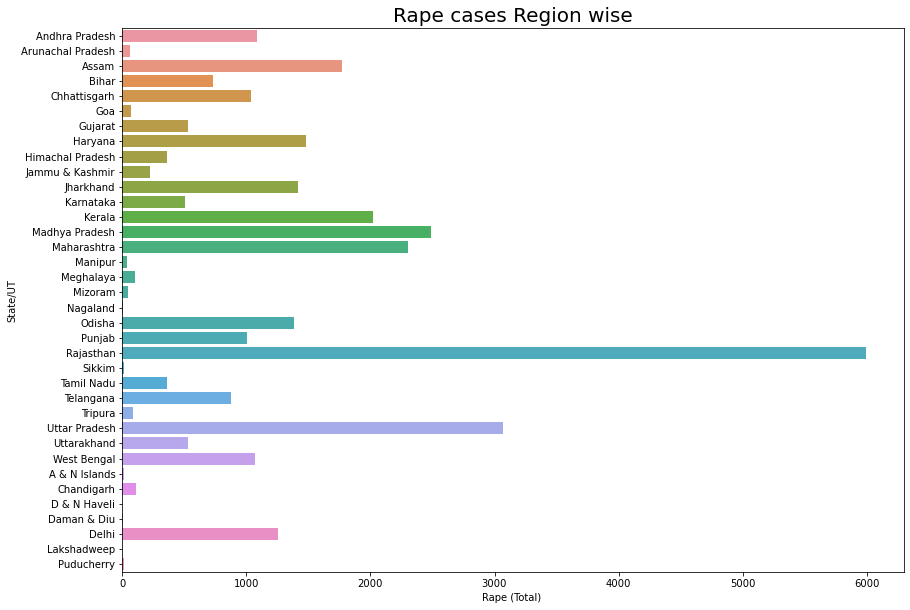

In [18]:
plt.figure(figsize = (14,10))
sns.barplot(data= rape, x= 'Rape (Total) ',y='State/UT')
plt.title('Rape cases Region wise',size = 20)

Text(0.5, 1.0, 'Difference between rape cases and punishment given')

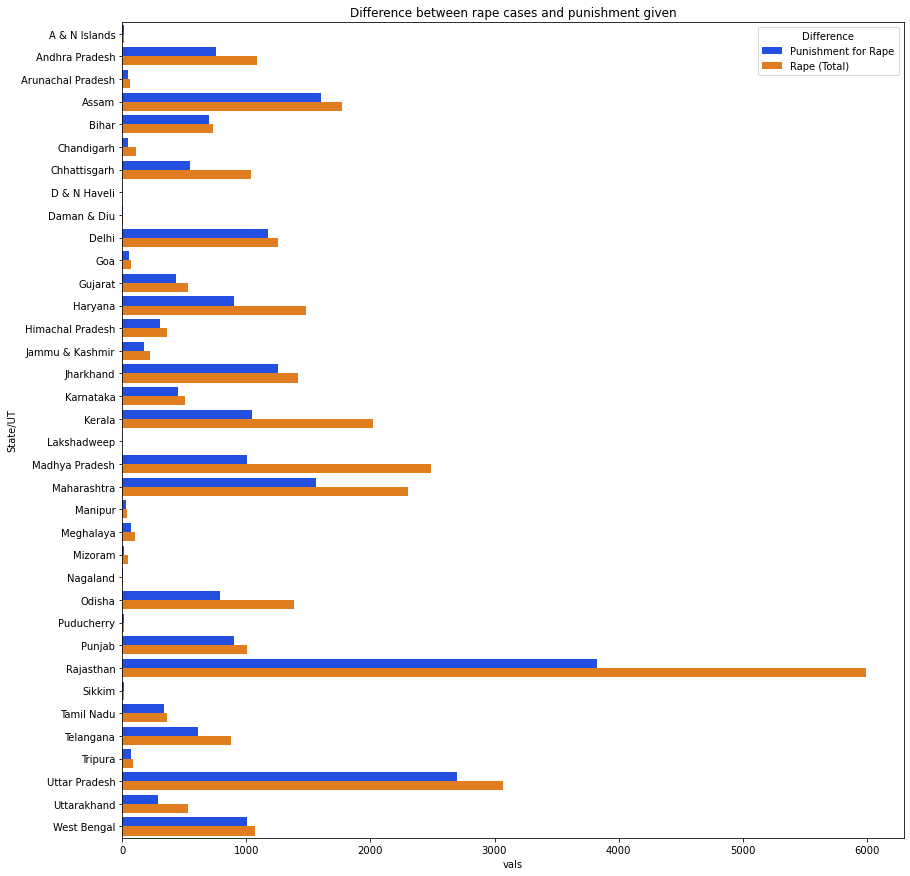

In [19]:
rapediff = rape.groupby(['State/UT'])['Punishment for Rape','Rape (Total) '].sum().reset_index() 
rapediff = rapediff.melt('State/UT', var_name='Difference',  value_name='vals')
plt.figure(figsize = (14,15))
ax = sns.barplot(y = 'State/UT' , x = 'vals',hue = 'Difference' ,data = rapediff ,palette= 'bright')
plt.title("Difference between rape cases and punishment given")

Text(0.5, 1.0, 'Region wise Custodial Rape')

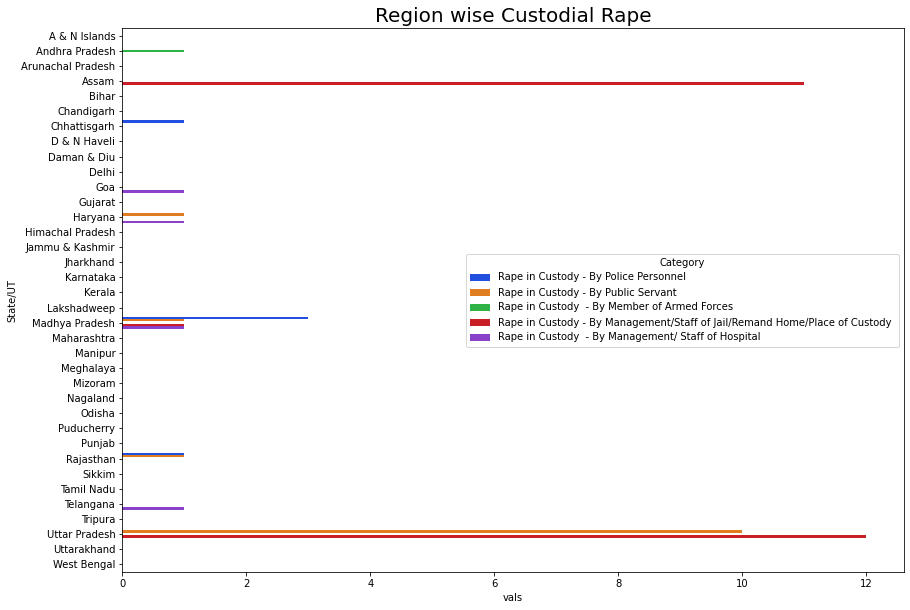

In [20]:
rapecustody = rape.groupby(['State/UT'])['Rape in Custody - By Police Personnel','Rape in Custody - By Public Servant ','Rape in Custody  - By Member of Armed Forces ','Rape in Custody - By Management/Staff of Jail/Remand Home/Place of Custody ','Rape in Custody  - By Management/ Staff of Hospital'].sum().reset_index() 
rapecustody = rapecustody.melt('State/UT', var_name='Category',  value_name='vals')
plt.figure(figsize = (14,10))
ax = sns.barplot(y = 'State/UT' , x = 'vals',hue = 'Category' ,data = rapecustody ,palette= 'bright')
plt.title("Region wise Custodial Rape",size=20)

Text(0.5, 1.0, 'Region wise Non-Custodial Rape')

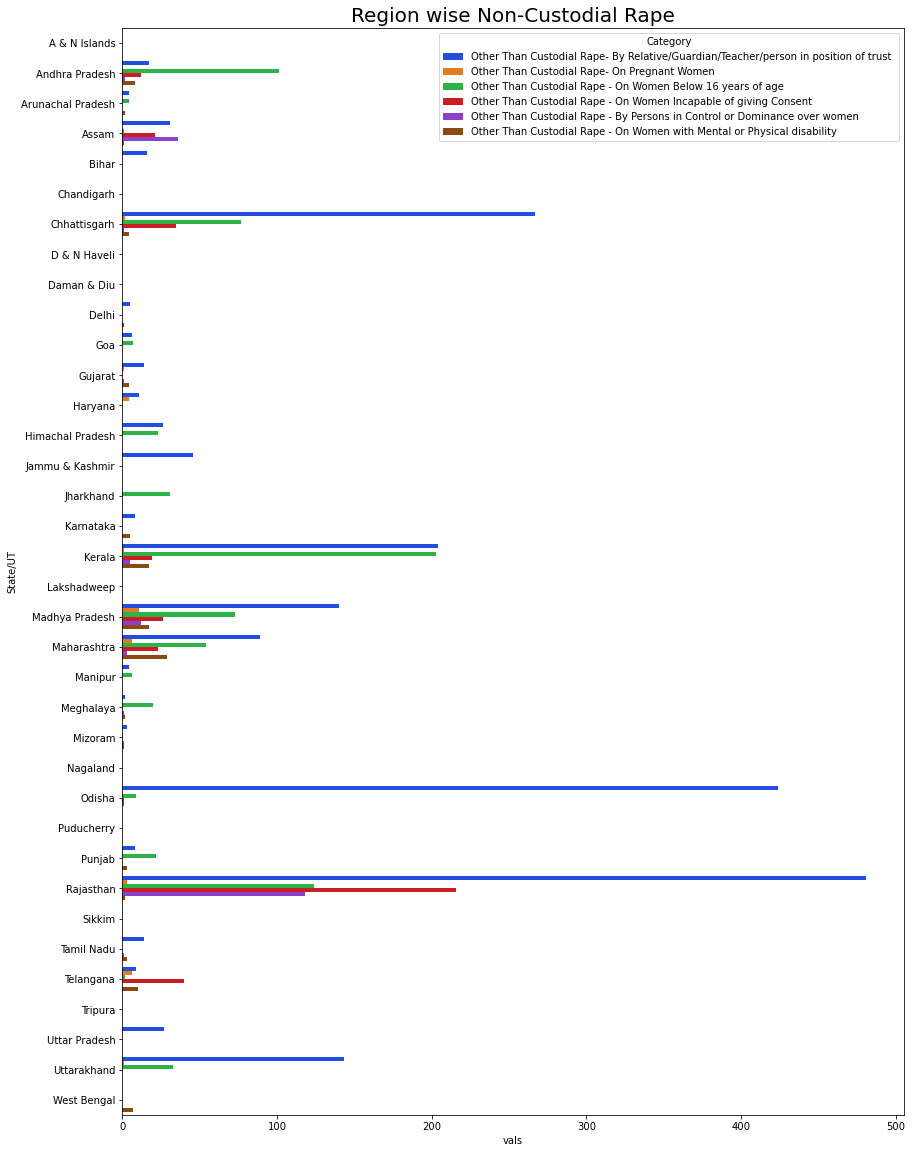

In [21]:
rape1 = rape.groupby(['State/UT'])['Other Than Custodial Rape- By Relative/Guardian/Teacher/person in position of trust ','Other Than Custodial Rape- On Pregnant Women ','Other Than Custodial Rape - On Women Below 16 years of age ','Other Than Custodial Rape - On Women Incapable of giving Consent ','Other Than Custodial Rape - By Persons in Control or Dominance over women','Other Than Custodial Rape - On Women with Mental or Physical disability'].sum().reset_index() 
rape1 = rape1.melt('State/UT', var_name='Category',  value_name='vals')
plt.figure(figsize = (14,20))
ax = sns.barplot(y = 'State/UT' , x = 'vals',hue = 'Category' ,data = rape1 ,palette= 'bright')
plt.title("Region wise Non-Custodial Rape",size=20)

Text(0.5, 1.0, 'Region wise GangRape')

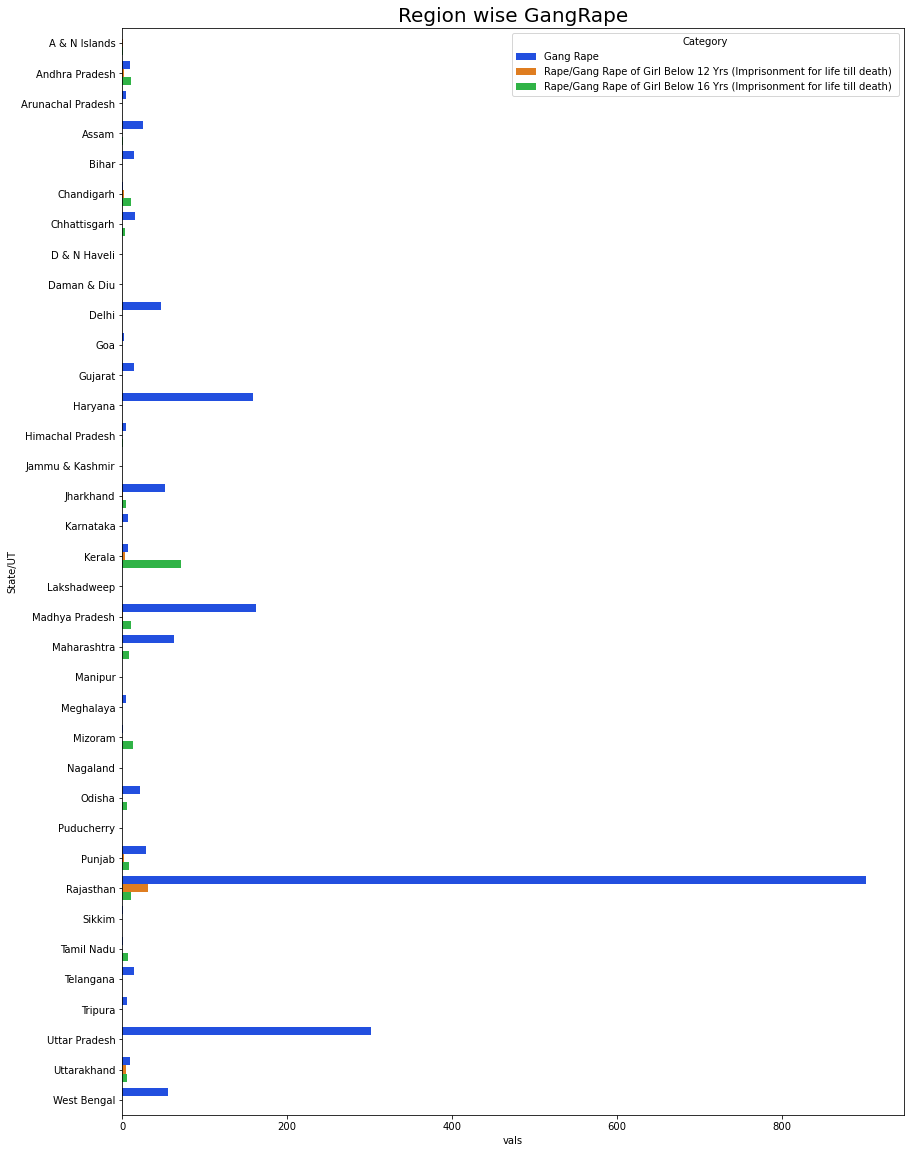

In [22]:
rape2 = rape.groupby(['State/UT'])['Gang Rape','Rape/Gang Rape of Girl Below 12 Yrs (Imprisonment for life till death) ','Rape/Gang Rape of Girl Below 16 Yrs (Imprisonment for life till death) '].sum().reset_index() 
rape2 = rape2.melt('State/UT', var_name='Category',  value_name='vals')
plt.figure(figsize = (14,20))
ax = sns.barplot(y = 'State/UT' , x = 'vals',hue = 'Category' ,data = rape2 ,palette= 'bright')
plt.title("Region wise GangRape",size=20)

# Analysis

1. Rajasthan has the highest reported rape cases followed by UP.
2. In almost half the cases of Madhya Pradesh, Kerala, Rajasthan, punishment is still not given
3. Assam has high number of cases of rape in Custody by Management/Staff of Jail/Remand Home/Place of Custody
4. Uttar Pradesh has high number of cases of rape in Custody by Management/Staff of Jail/Remand Home/Place of Custody and rape in Custody by Public Servant
5. Odisha, Rajasthan and chattisgarh have high number of cases of rape by Relative/Guardian/Teacher/person in position of trust
6. Rajasthan, kerala, andhra pradesh have high number of cases of rape on Women Below 16 years of age.
7. Number of cases of gang rape in rajasthan are really high followed by uttar pradesh, haryana and madhya pradesh